**Questão 11 (Tucci; Pag.: 330)**: Para os seguintes esquemas de bombeamento, determinar os rebaixamentos num piezômetro localizado a 200m de um poço de produção. Faça um gráfico dos rebaixamento em função do tempo (semanas).

In [10]:
import pandas as pd
import math

In [11]:
semana = [1, 2, 3, 4, 5, 6]
volume = [100000, 50000, 100000, 50000, 100000, 50000]
series = pd.Series(volume, index = semana, name = 'Volume')
series

1    100000
2     50000
3    100000
4     50000
5    100000
6     50000
Name: Volume, dtype: int64

In [38]:
def W(u):
    return -0.5772 - math.log(u) + u - ((u**2)/4) + ((u**3)/18)

In [37]:
def delta(n, T, r, alfa):
    w1 = W((r**2)/(4*alfa*n))
    try:
        w2 = W((r**2)/(4*alfa*(n-1)))
    except ZeroDivisionError:
        w2 = 0
    return (1/(4*math.pi*T))*(w1-w2)

In [49]:
def s(df, T, r, alfa):
    
    n = len(df)
    lista = pd.Series(name = 'rebaixa')
    for i in range(1, n+1):
        soma = 0
        for j in range(1, i+1):
            soma += (df[j] * delta((i-j+1), T, r, alfa))
        
        lista.at[i] = soma
    return lista

df = series
T = 10000
r = 200
alfa = 50000

reb = s(df, T, r, alfa)

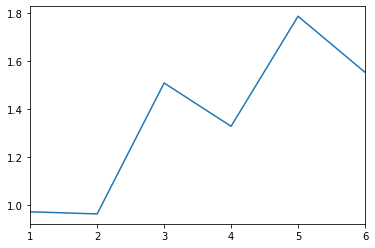

In [52]:
reb.plot()

**Questão 10 (Tucci pg.: 330)**: Calcule os núcleos discretos de bombeamento para n = 1, 2, 3, ..., 6 semanas e r = 200m para aquíferos homogêneo com porosidade efetiva 0,2 e trasmissividade 10000 m²/semana. Faça um gráfico com os resultados obtidos.